<b> Newark Data Analysis 2012 - Akhil Patil

In [48]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = (13, 16)


In [49]:
# The code was removed by Watson Studio for sharing.

,FID,FID_Crime_,FID_Crime,FID_,Status,Score,Match_type,Side,X,Y,Match_addr,Address_Co,latitude,longitude,ARC_Street,CCNO,INCIDENTTY,Incident_Date_Fromatted,DOW,INCIDENTTI,HOUR,SECTOR,PRECINCT,Location,STARTTIME,ENDTIME,SDOW,EDOW,LOCATIONCL,LOCATIONTY,SECTOROFRE,INSIDE,CROSSSTREE,ITEM1,ITEM2,ITEM3,ENTRYZONE,MOTIVE1,Neighborhood
0,0,0,7413,,M,100,A,R,575049.3849,675274.0894,2 PENSEY PL,2 PENSEY PL Newark NJ,0.000000,0.000000,2-8 PENSEY PL,C12-047282,Burglary,2012-07-20 00:00:00,FRI,0.683333,16,317,3RD,2-8 PENSEY PL,0.416667,0.583333,FRI,FRI,-1,COMMERCIAL,-1,IN,PENSEY PL,Copper/Metals,,-1,FRONT DOOR,PERSONAL GAIN,Dayton
1,1,1,5292,,M,100,A,R,575056.9702,675310.6869,12 PENSEY PL,12 PENSEY PL Newark NJ,40.687000,-74.200939,12 PENSEY PLACE,C12-035172,Auto Theft,2012-05-31 00:00:00,THU,0.527778,12,317,3RD,12 PENSEY PLACE,0.083333,0.364583,THU,THU,-1,STREET,-1,OUT,PENSEY PLACE,AUTO,,-1,-1,PERSONAL GAIN,Dayton
2,2,2,6028,,M,100,A,R,575064.2677,675324.1107,16 PENSEY PL,16 PENSEY PL Newark NJ,40.687037,-74.200912,16 PENSEY PL,C12-040067,Auto Theft,2012-06-19 00:00:00,TUE,0.834722,20,317,3RD,16 PENSEY PL,0.895833,0.250000,MON,TUE,-1,STREET,-1,-1,PENSEY PL,AUTO,-1,-1,-1,PERSONAL GAIN,Dayton
3,3,3,2735,,M,100,A,R,575067.9165,675330.8226,18 PENSEY PL,18 PENSEY PL Newark NJ,40.687055,-74.200899,18 PENSEY PL,C12-017550,Auto Theft,2012-03-20 00:00:00,TUE,0.915278,21,317,3RD,18 PENSEY PL,0.875000,0.875000,TUE,TUE,-1,STREET,-1,OUT,PENSEY PL,AUTO,,-1,-1,PERSONAL GAIN,Dayton
4,4,4,5385,,M,100,A,R,575071.5653,675337.5345,20 PENSEY PL,20 PENSEY PL Newark NJ,40.687073,-74.200886,20 PENSEY PL,C12-035764,Burglary,2012-02-06 00:00:00,SAT,0.934028,22,317,3RD,20 PENSEY PL,0.791667,0.927083,SAT,SAT,-1,DWELLING,-1,IN,PENSEY PL,JEWELRY,,-1,FRONT DOOR,PERSONAL GAIN,Dayton


In [50]:
df.isna().sum() #NuLL values are replaced with -1 beforehand

FID                        0
FID_Crime_                 0
FID_Crime                  0
FID_                       0
Status                     0
Score                      0
Match_type                 0
Side                       0
X                          0
Y                          0
Match_addr                 0
Address_Co                 0
latitude                   0
longitude                  0
ARC_Street                 0
CCNO                       0
INCIDENTTY                 0
Incident_Date_Fromatted    0
DOW                        0
INCIDENTTI                 0
HOUR                       0
SECTOR                     0
PRECINCT                   2
Location                   0
STARTTIME                  0
ENDTIME                    0
SDOW                       0
EDOW                       0
LOCATIONCL                 0
LOCATIONTY                 0
SECTOROFRE                 0
INSIDE                     0
CROSSSTREE                 0
ITEM1                      0
ITEM2         

In [51]:
df.columns

Index(['FID', 'FID_Crime_', 'FID_Crime', 'FID_', 'Status', 'Score',
       'Match_type', 'Side', 'X', 'Y', 'Match_addr', 'Address_Co', 'latitude',
       'longitude', 'ARC_Street', 'CCNO', 'INCIDENTTY',
       'Incident_Date_Fromatted', 'DOW', 'INCIDENTTI', 'HOUR', 'SECTOR',
       'PRECINCT', 'Location', 'STARTTIME', 'ENDTIME', 'SDOW', 'EDOW',
       'LOCATIONCL', 'LOCATIONTY', 'SECTOROFRE', 'INSIDE', 'CROSSSTREE',
       'ITEM1', 'ITEM2', 'ITEM3', 'ENTRYZONE', 'MOTIVE1', 'Neighborhood'],
      dtype='object')

In [52]:
df.dtypes

FID                          int64
FID_Crime_                   int64
FID_Crime                    int64
FID_                        object
Status                      object
Score                        int64
Match_type                  object
Side                        object
X                          float64
Y                          float64
Match_addr                  object
Address_Co                  object
latitude                   float64
longitude                  float64
ARC_Street                  object
CCNO                        object
INCIDENTTY                  object
Incident_Date_Fromatted     object
DOW                         object
INCIDENTTI                 float64
HOUR                         int64
SECTOR                       int64
PRECINCT                    object
Location                    object
STARTTIME                  float64
ENDTIME                    float64
SDOW                        object
EDOW                        object
LOCATIONCL          

In [53]:
pd.set_option('display.max_columns', None)


In [54]:
df['Incident_Date_Fromatted'] = pd.to_datetime(df['Incident_Date_Fromatted'],format='%Y-%m-%d')

In [55]:
df.dtypes

FID                                 int64
FID_Crime_                          int64
FID_Crime                           int64
FID_                               object
Status                             object
Score                               int64
Match_type                         object
Side                               object
X                                 float64
Y                                 float64
Match_addr                         object
Address_Co                         object
latitude                          float64
longitude                         float64
ARC_Street                         object
CCNO                               object
INCIDENTTY                         object
Incident_Date_Fromatted    datetime64[ns]
DOW                                object
INCIDENTTI                        float64
HOUR                                int64
SECTOR                              int64
PRECINCT                           object
Location                          

In [56]:
gr_count = df.groupby(['INCIDENTTY'], as_index=['INCIDENTTY']).count().ix[:, 1]
gr_count


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


INCIDENTTY
Agg Assault          1049
Auto Theft           3907
Burglary             2080
Criminal Mischief     210
Found Property         54
Homicide                6
Murder                 84
Poss Of Weapon        222
Rape                   53
Robbery              1968
Sexual Assault          2
Theft                1623
Theft F/A            2294
Unfounded             605
Name: FID_Crime_, dtype: int64

In [57]:
crimes = gr_count.index
crimes

Index(['Agg Assault', 'Auto Theft', 'Burglary', 'Criminal Mischief',
       'Found Property', 'Homicide', 'Murder', 'Poss Of Weapon', 'Rape',
       'Robbery', 'Sexual Assault', 'Theft', 'Theft F/A', 'Unfounded'],
      dtype='object', name='INCIDENTTY')

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


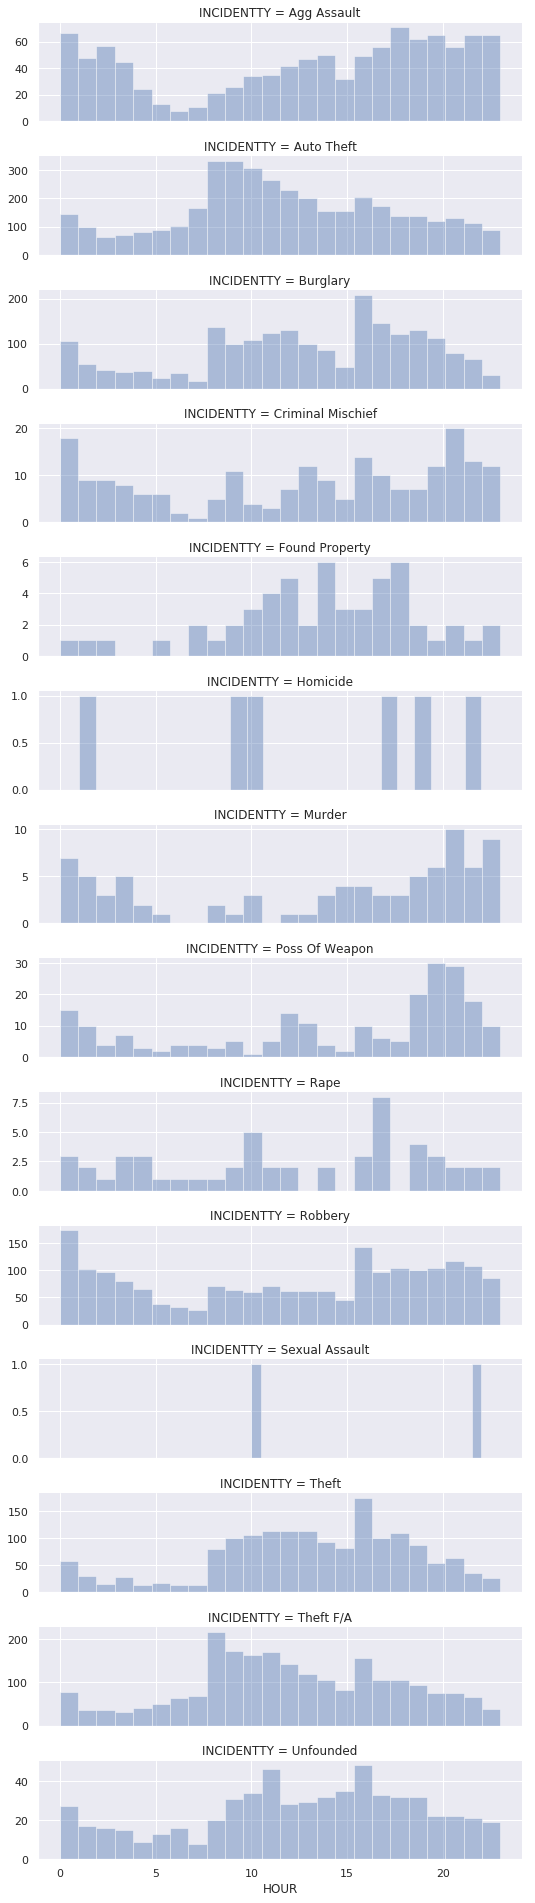

In [58]:
g = sns.FacetGrid(df, 
                  row="INCIDENTTY", 
                  row_order=crimes,
                  size=1.9, aspect=4, 
                  sharex=True,
                  sharey=False)

g.map(sns.distplot, "HOUR", bins=24, kde=False, rug=False)


In [59]:
crimes_time_series = df.groupby(['INCIDENTTY', 'Incident_Date_Fromatted'], as_index=['INCIDENTTY', 'Incident_Date_Fromatted']).count().ix[:,1].unstack(level=0).unstack(level=0).fillna(0)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


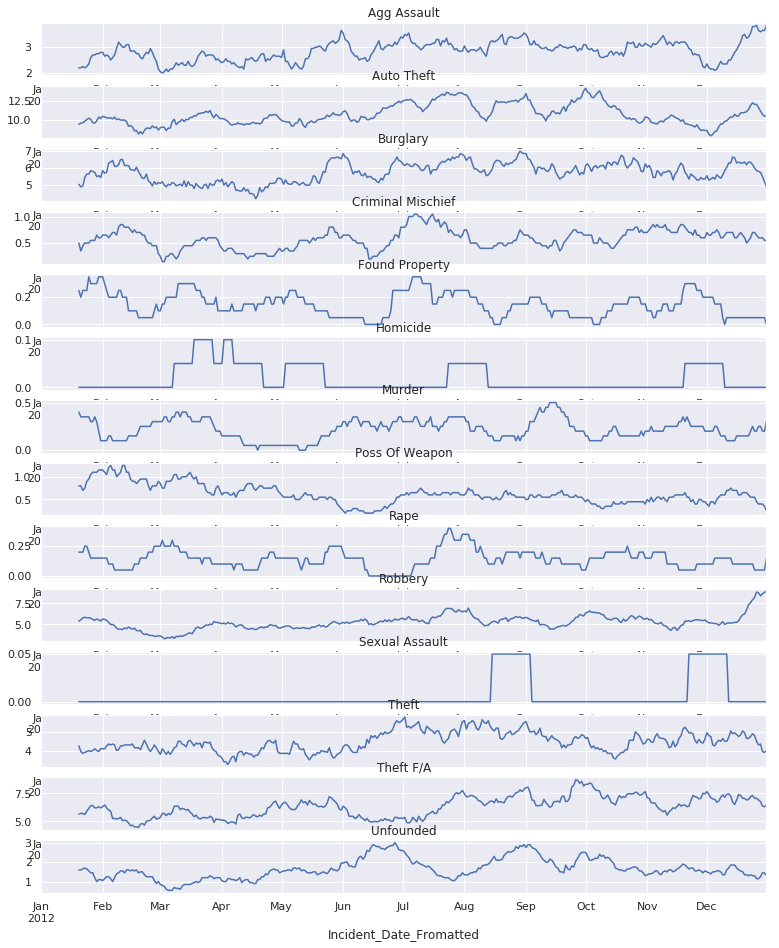

In [60]:
for i, col in zip(range(1, len(crimes) + 1), crimes):
    plt.subplot(len(crimes), 1, i)
    plt.title(col)
    crimes_time_series[col].rolling(window=20, min_periods=20).mean().plot()


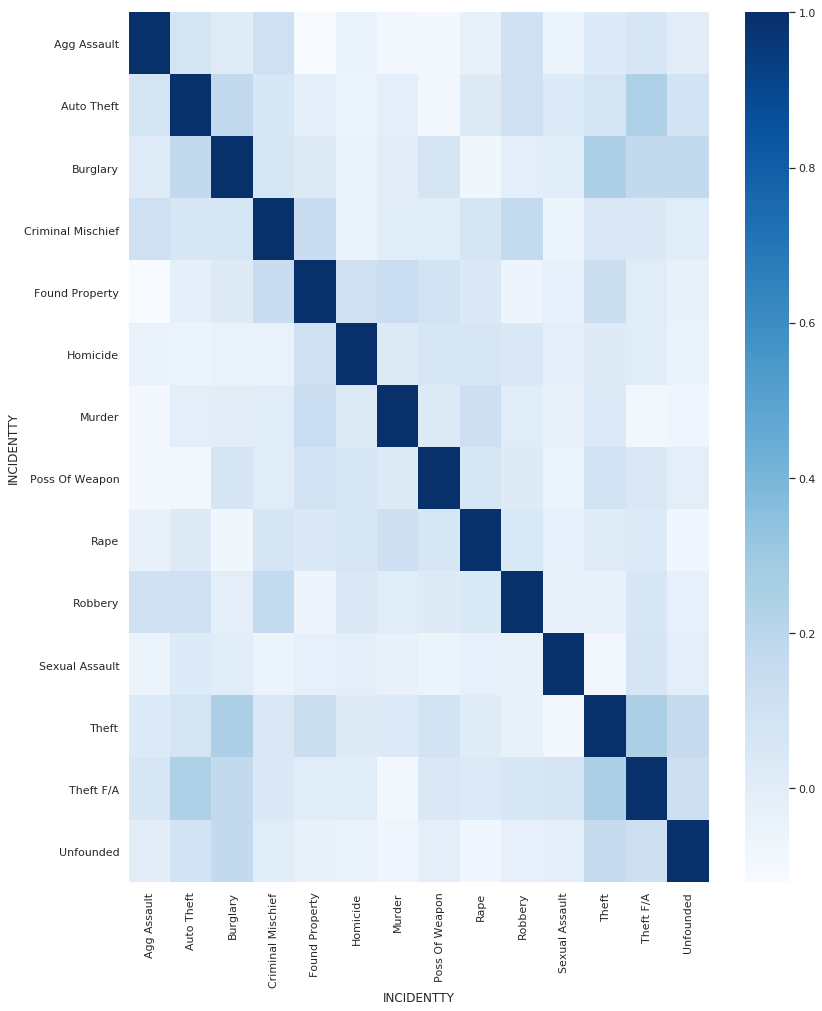

In [61]:
correlation_matrix = crimes_time_series.unstack(0)[crimes].corr()
sns.heatmap(correlation_matrix,cmap="Blues")


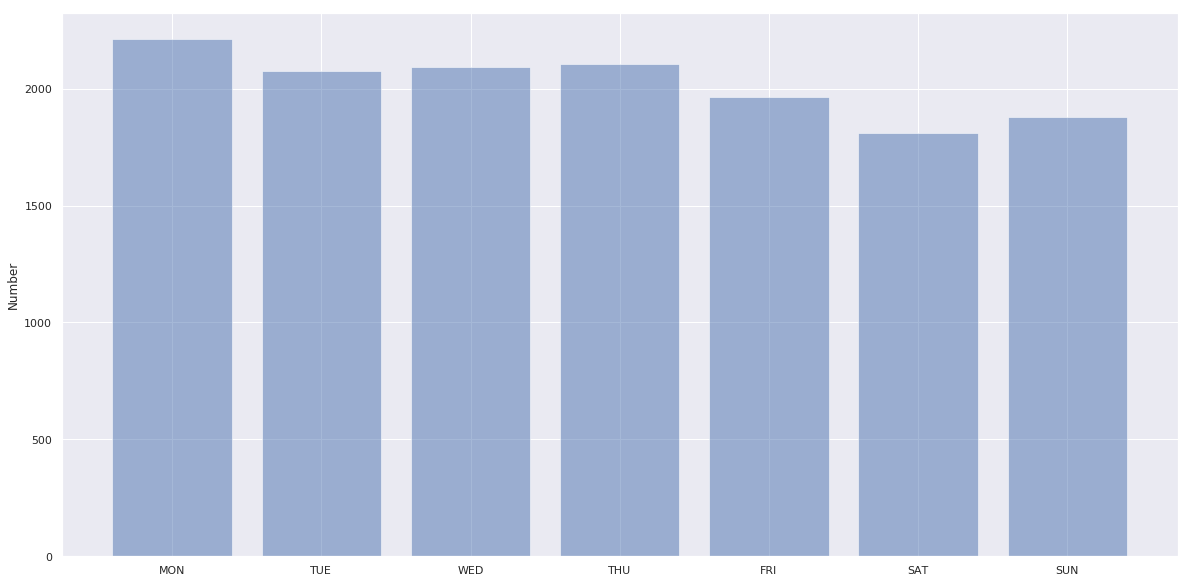

In [62]:

# bar_code
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 

#5.4. Total number crime for each day of week

def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

day_of_week = ('MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN')

list_unique_day, list_number_day = create_list_number_crime('DOW',day_of_week)

#pie_plot(list_unique_day,list_number_day)

bar_chart(list_number_day,list_unique_day)

In [63]:
df['Month']=pd.DatetimeIndex(df['Incident_Date_Fromatted']).month

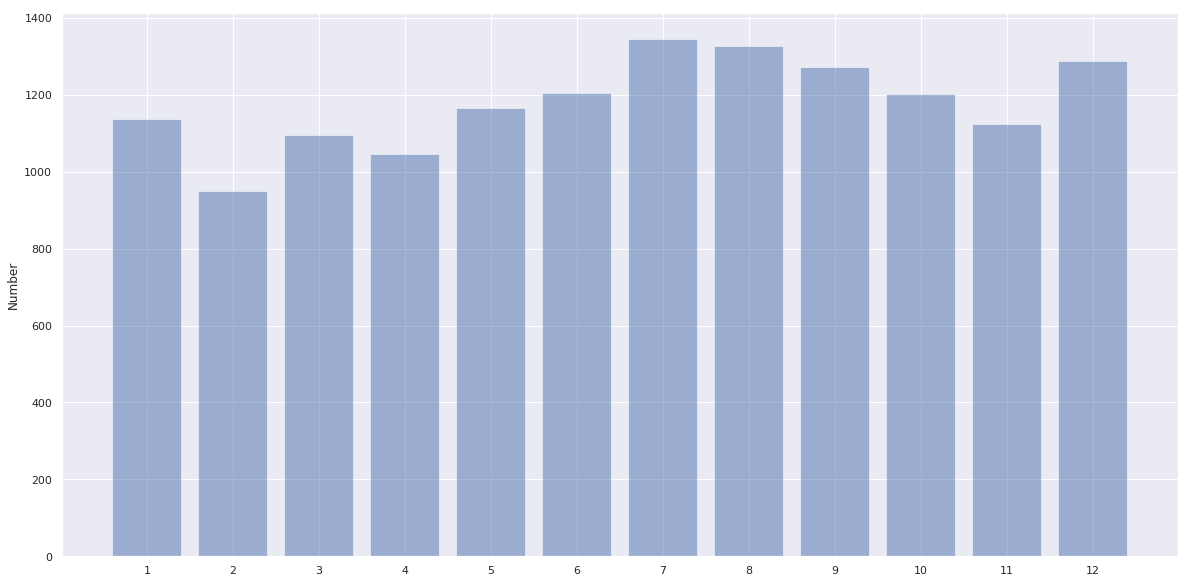

In [64]:
list_unique_month, list_number_month = create_list_number_crime('Month',list(range(1,13)))
bar_chart(list_number_month,list_unique_month)


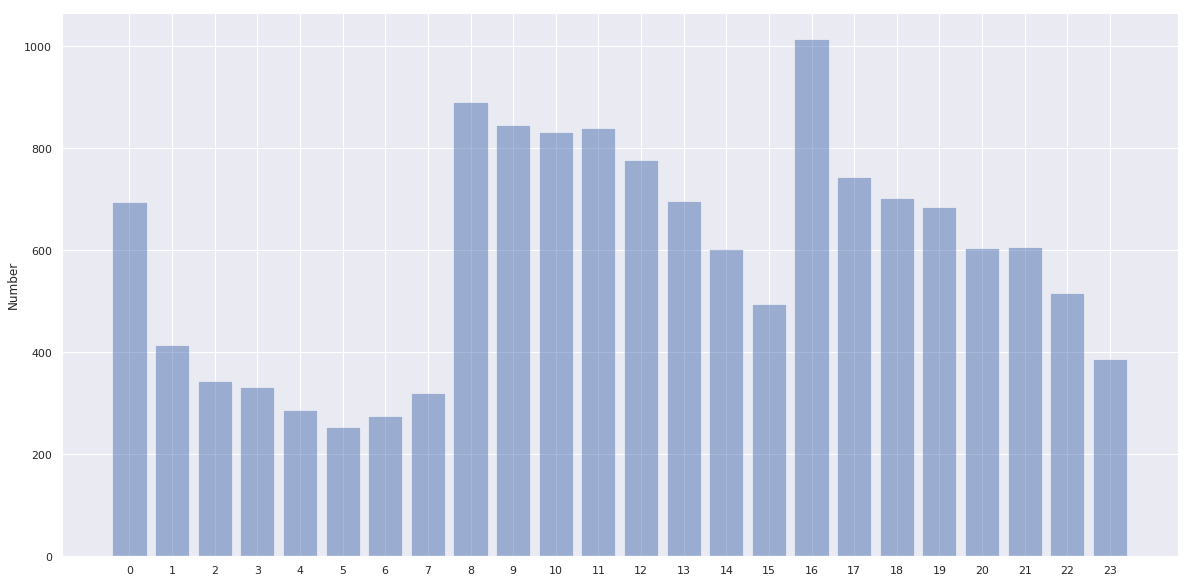

In [65]:
list_unique_hour, list_number_hour = create_list_number_crime('HOUR',list(range(0,24)))
bar_chart(list_number_hour,list_unique_hour)

df_nwk1 = df.groupby(['Neighborhood']).count().ix[:, 1]
df_nwk1 =  pd.DataFrame(df_nwk1)
df_nwk1.reset_index(level=df_nwk1.index.names, inplace=True)
df_nwk1.columns = ['Neighborhood','Count']
df_nwk1


latitude = 40.73
longitude = -74.25

nwk_map = folium.Map(location=[latitude, longitude], zoom_start=12)


folium.GeoJson(nwk_json).add_to(nwk_map)

#bins = list(df_nwk1['Count'].quantile([0, 0.25, 0.5, 0.75, 0.85, 1]))


folium.Choropleth(
    geo_data=nwk_json,
    data=df_nwk1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.Neighborhood',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5, 
    legend_name='Crime Rate in Newark',
    reset=True
).add_to(nwk_map)


#folium.LayerControl(collapsed=False).add_to(nwk_map)

nwk_map